# 最初のエントリまで

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### 必要なライブラリをまとめてインポート

In [2]:
import datetime
import re

from matplotlib import (
    dates as mdates,
    font_manager as fm,
    pyplot as plt,
    ticker as ticker,
)
import numpy as np
import pandas as pd

from funcs.plots import getMajorXTicks
from funcs.preprocs_no_qt import get_date_formatted
from tech.osc import wilder_rsi

### 過去ログ (Tick) の読み込み

In [69]:
code = '8306'
dateStr = '20250317'

dateFmt = get_date_formatted(dateStr)
tick_excel = '../excel/trader_%s.xlsm' % dateStr
sheet = 'tick_%s' % code
df = pd.read_excel(tick_excel, sheet_name=sheet)

# Tick データを Matplotlib で扱いやすいように整形
list_datetime = [pd.to_datetime('%s %s'% (dateStr, t)) for t in df['Time']]
df.index = list_datetime
df = pd.DataFrame(df['Price'])
df

,Price
2025-03-17 09:00:01,2018.0
2025-03-17 09:00:04,2020.0
2025-03-17 09:00:06,2024.5
2025-03-17 09:00:08,2024.0
2025-03-17 09:00:10,2025.5
...,...
2025-03-17 15:24:51,2027.5
2025-03-17 15:24:55,2027.0
2025-03-17 15:24:56,2027.5
2025-03-17 15:24:59,2027.5


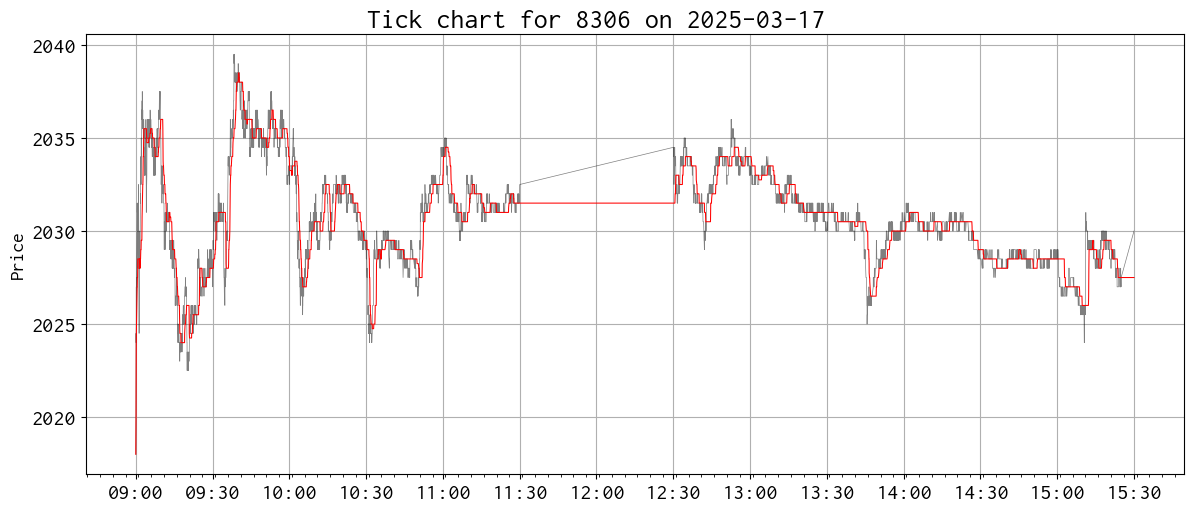

In [88]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

ax = dict()
n = 1

if n > 1:
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(
        n, 1,
        wspace=0.0, hspace=0.0,
        height_ratios=[3 if i == 0 else 1 for i in range(n)]
    )
    for i, axis in enumerate(gs.subplots(sharex='col')):
        ax[i] = axis
        ax[i].grid()
else:
    fig, ax[0] = plt.subplots(figsize=(12, 5))
    ax[0].grid()

# -----------------------------------------------------------------------------
# Tick
# -----------------------------------------------------------------------------
ser = df['Price']
ax[0].plot(ser, linewidth=0.5, color='black', alpha=0.5)

tick_position, tick_labels = getMajorXTicks(df)
ax[0].set_xticks(ticks=tick_position, labels=tick_labels,)
ax[0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=5))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_ylabel('Price', fontsize=14)

#ax[0].set_title('AF: init=%.5f, step=%.5f, max=%.5f, q=%d' % (af_init, af_step, af_max, q), fontsize=16)

# -----------------------------------------------------------------------------
# Deviation
# -----------------------------------------------------------------------------
ser2 = df['Price'].rolling(50, min_periods=1).median()

ax[0].plot(ser2, linewidth=0.75, color='red', alpha=1)
#ax[1].set_ylabel('RSI', fontsize=14)
#ax[1].axhline(y=50, linewidth=0.5, color='black', alpha=1)
#ax[1].set_ylim(0, 100)

suptitle = 'Tick chart for %s on %s' % (code, dateFmt)
plt.suptitle(suptitle, fontsize=20)

#plt.tight_layout()
plt.subplots_adjust(left=0.075, right=0.99, bottom=0.05, top=0.93)
#plt.savefig('screenshots/tick_chart_%s_%s.png' % (code, dateFmt))
plt.show()

In [71]:
ser2 = df['Price'].rolling(100, min_periods=1).median()
ser2

2025-03-17 09:00:01    2018.0
2025-03-17 09:00:04    2019.0
2025-03-17 09:00:06    2020.0
2025-03-17 09:00:08    2022.0
2025-03-17 09:00:10    2024.0
                        ...  
2025-03-17 15:24:51    2028.0
2025-03-17 15:24:55    2028.0
2025-03-17 15:24:56    2028.0
2025-03-17 15:24:59    2028.0
2025-03-17 15:30:00    2028.0
Name: Price, Length: 6117, dtype: float64